#  Mall Customers Segmentation - Clustering

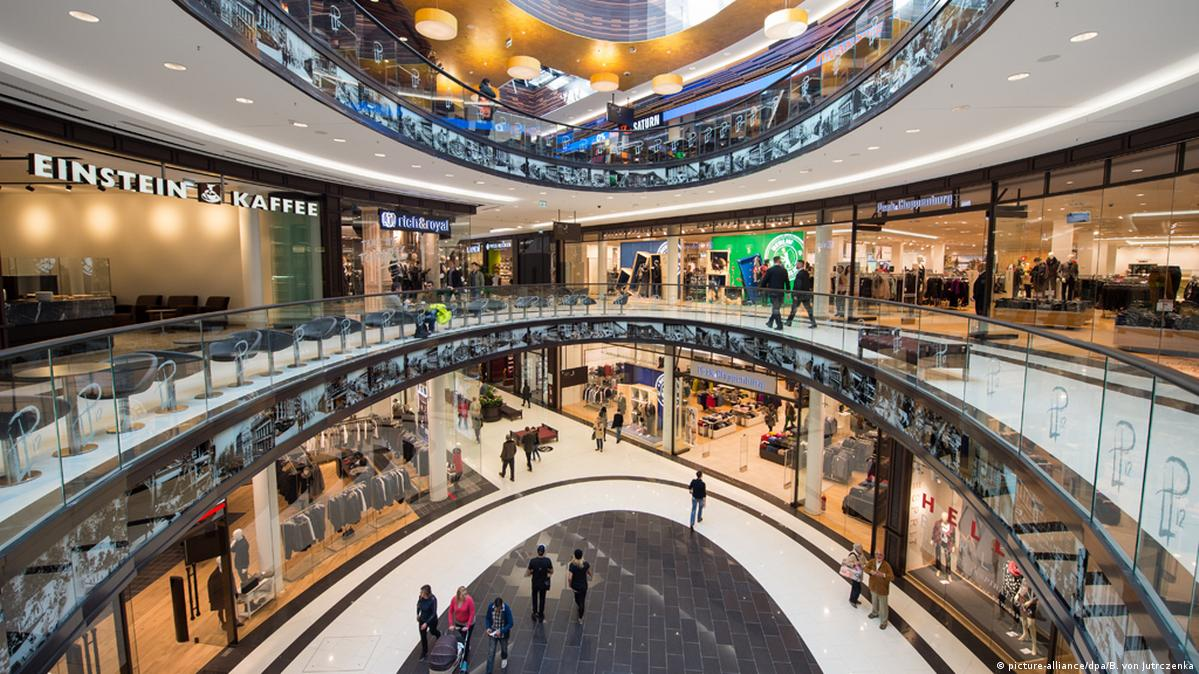

#Problem Statement
Mall owners want to understand the purpose of the customer segmentation concepts, try to understand customers and separate them in different groups according to their preferences

# Objective
Our aim is to segment the customers so that targeted marketing can be implemented on the customers. For instance, different categories of customers can be provided with category specific offers, thus leading to increased revenue and profits for the mall stores.

# Business Goal
Our job is to categorise the customers using some economic and other factors that determine the overall development of the mall customers.

Below are the steps which we will be basically following:


1.   Step 1: Reading and Understanding the Data
2.   Step 2: Data Cleaning 
3.   Step 3: Data Visualization
4.   Step 4: Data Preparation
5.   Step 5: K-mean Clustering 
6.   Step 6: Hierarchical Clustering
7.   Comparison









#Step 1: Reading and Understanding the Data

In [103]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [104]:
# Reading the data dictionary file
data=pd.read_csv("mall customers.csv")

In [105]:
# displaying first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
# (number of rows, number of columns)
data.shape

(200, 5)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [108]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


*   Age of the customers ranges from 18-70.This shows that the mall attracts has shops and things which suite all
age group people.
*   Average age of customers is about 39.
*   Average income of customers is 60 K$.
*   Average spending score of customers is 50.

#Step 2 : Data Cleaning

We need to do some basic cleaning check in order to feed our model the correct data.

In [109]:
# finding any null values in data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

As we can see thankfully there are no missing values in this particular dataset.

In [110]:
# Datatype check for the dataframe
data.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

None of the columns have inconsistent datatype, hence no conversion is required.

In [111]:
# Duplicates check
data.loc[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


The dataset seems to be almost clean and hence no such cleansing activities are required.

#Step 3 : Data Visualization

In [112]:
# Finding the number of males and females in the data
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

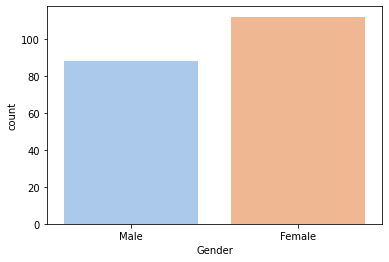

In [113]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=data,palette="pastel")
plt.show()

The number of females customers is more than the number of male customers

In [114]:
# Computing minimum and maximum age of customers
print(min(data.Age))
print(max(data.Age))

18
70


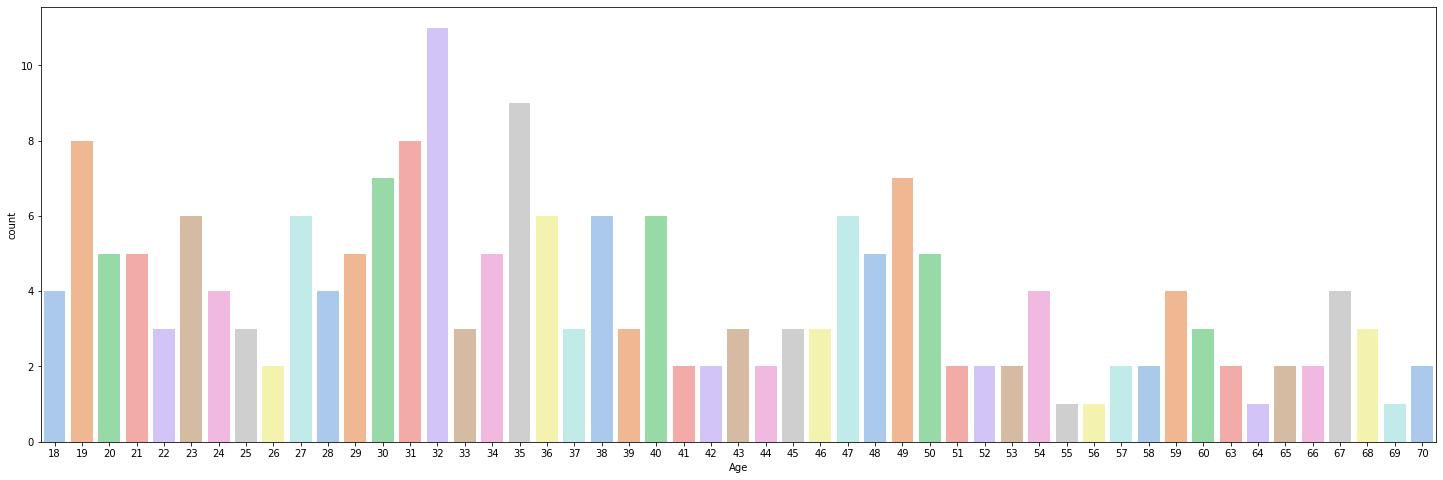

In [115]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")
plt.show()

Customers with age 32 make for the largest number of customers.

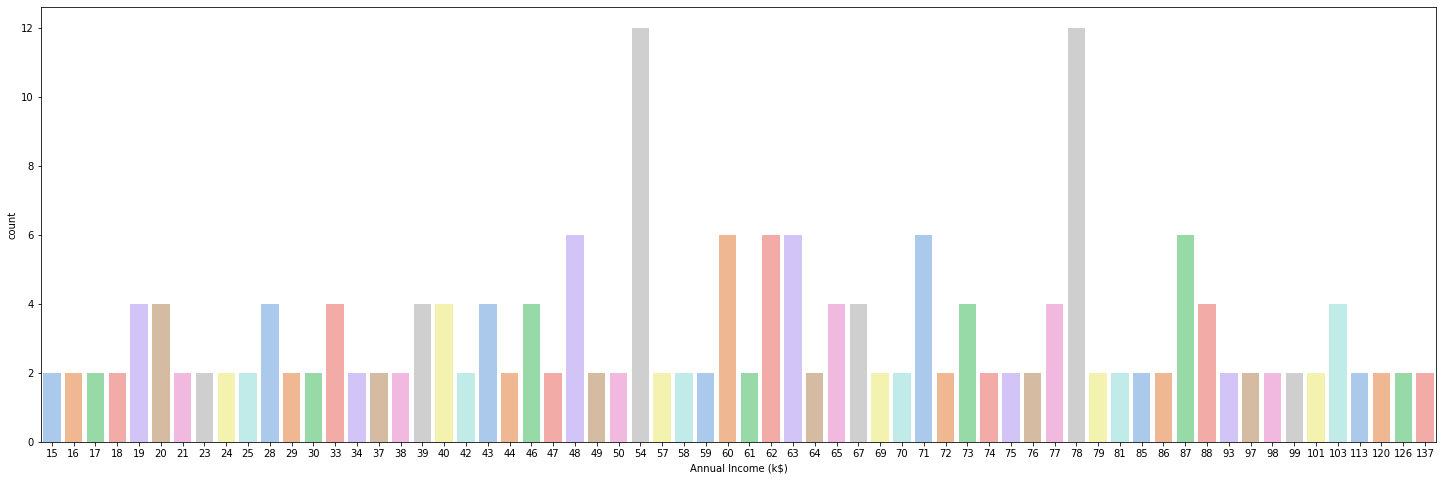

In [116]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="pastel")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

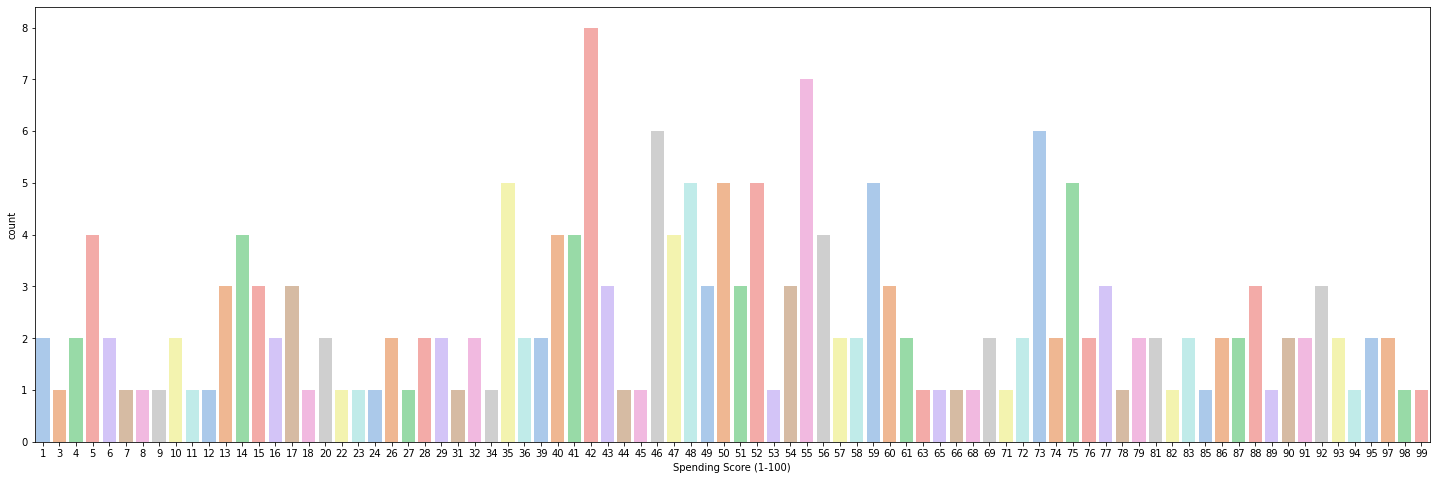

In [117]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=data,palette="pastel")
plt.show()

The maximum spending score is 42.

let's now check for the relationship between different features by using a pairplot.

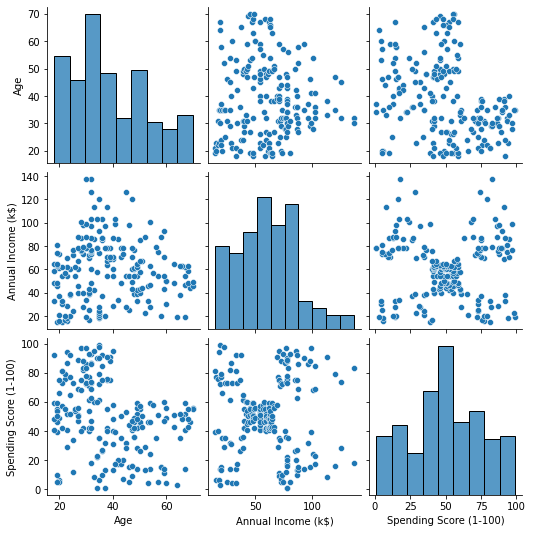

In [118]:
sns.pairplot(data[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

*   Most of the customers are in the 20-40 age group.
*   Spending score is high for the customers in the age group of 20-40.
*   Spending score is high for customers with very low and very high income.


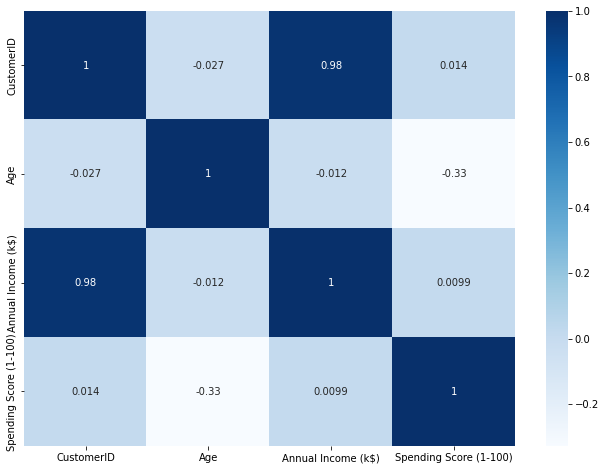

In [119]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

As we can see there is not much correlation between the features.

Correlation between age and spending score is -0.33

Correlation between age and annual income is -0.012

Correlation between spending score and annual income is 0.0099

# Step 4: Data Preparation


**Creating** **Dummies**

We have the 'Gender' feature as a categorical one, let's convert it into dummies.

Dummies create a separate boolean column for all unique values of a feature.

In [120]:
data_drop = pd.get_dummies(data, drop_first=True)
data_drop

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


# Step 5: K-Means Clustering

Clustering algorithms try to find natural clusters in data, the various aspects of how the algorithms to cluster data can be tuned and modified. Clustering is based on the principle that items within the same cluster must be similar to each other. The data is grouped in such a way that related elements are close to each other.


K-Means clustering 

An unsupervised machine learning algorithm that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.

It is a centroid based algorithm in which each cluster is associated with a centroid. The main idea is to reduce the distance between the data points and their respective cluster centroid.

The algorithm takes raw unlabeled data as an input and divides the dataset into clusters and the process is repeated until the best clusters are found.

K-Means is very easy and simple to implement. It is highly scalable, can be applied to both small and large datasets. There is, however, a problem with choosing the number of clusters or K. Also, with the increase in dimensions, stability decreases. But, overall K Means is a simple and robust algorithm that makes clustering very easy.

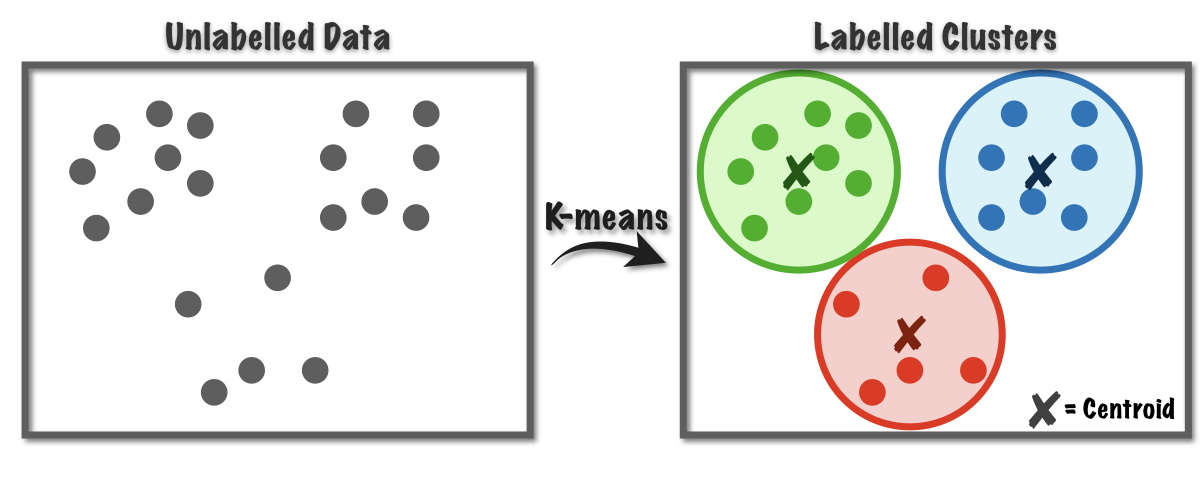

Making clusters based on Annual income and Spending Score.

In [124]:
# Taking annual income and spending score in x to make clusters
x=data.iloc[:,[3,4]]

In [125]:
# displaying first 5 rows of x
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow Method:

The “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

In [126]:
# Using elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans

In [127]:
# WCSS is Within Cluster Sum of Squares
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

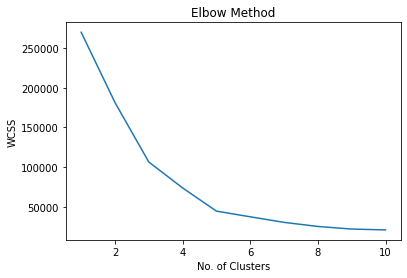

In [128]:
# Visualising elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 5

Applying K-Means :

In [129]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [130]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans
# it tells which data point belongs to which cluster (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [131]:
y_kmeans.astype

<function ndarray.astype>

In [132]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [133]:
x.astype

<function ndarray.astype>

Visualising the cluster :

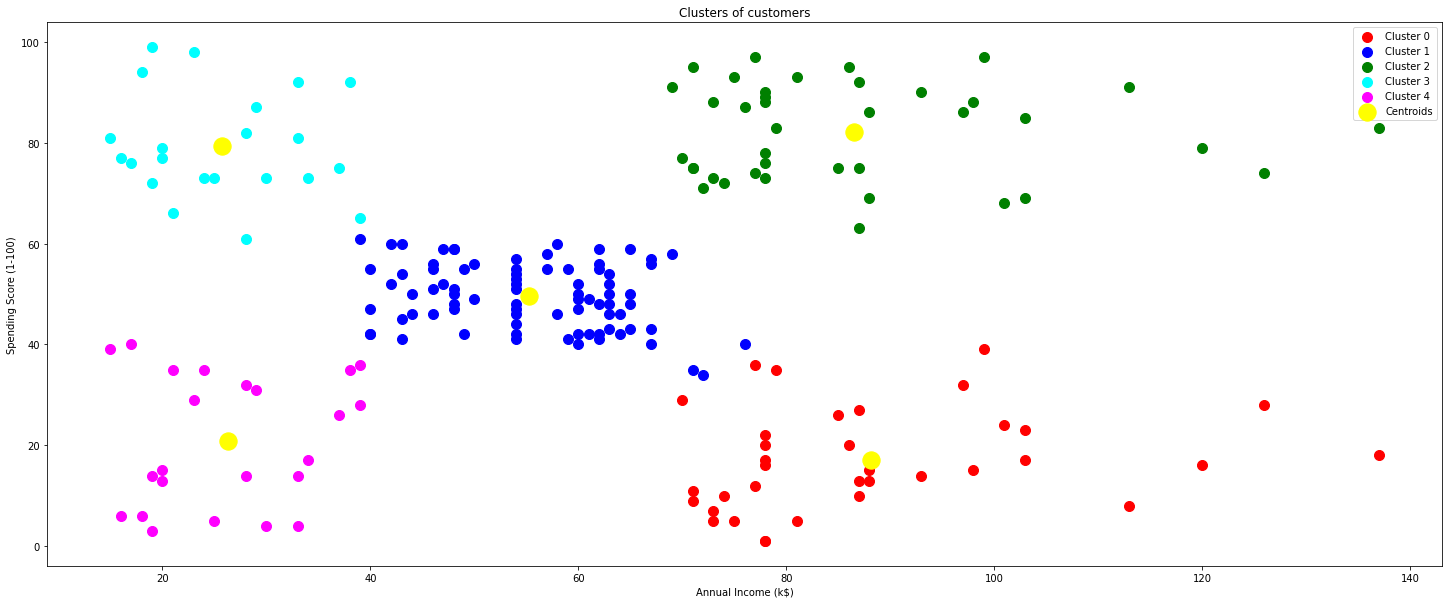

In [134]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [135]:
import plotly.express as px
fig = px.scatter_3d(data_drop, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_kmeans, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
# fig.update_layout is being used to make the 'color' legend shift towards left side, otherwise the 'color' and 'Gender_Male' legends overlap
# fig.show()

Cluster 0 contains customers with high annual income but low spending score.

Cluster 1 contains customers with average annual income and average spending score.

Cluster 2 contains customers with high annual income and high spending score.

Cluster 3 contains customers with low annual income but high spending score.

Cluster 4 contains customers with low annual income and low spending score.

#Step 6: Hierarchial Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

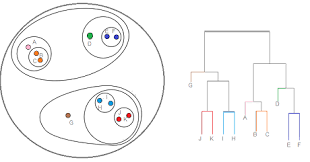

Dendrogram : It is a plot between Euclidean distance (y-axis) and data points (x-axis)

In [136]:
import scipy.cluster.hierarchy as sch

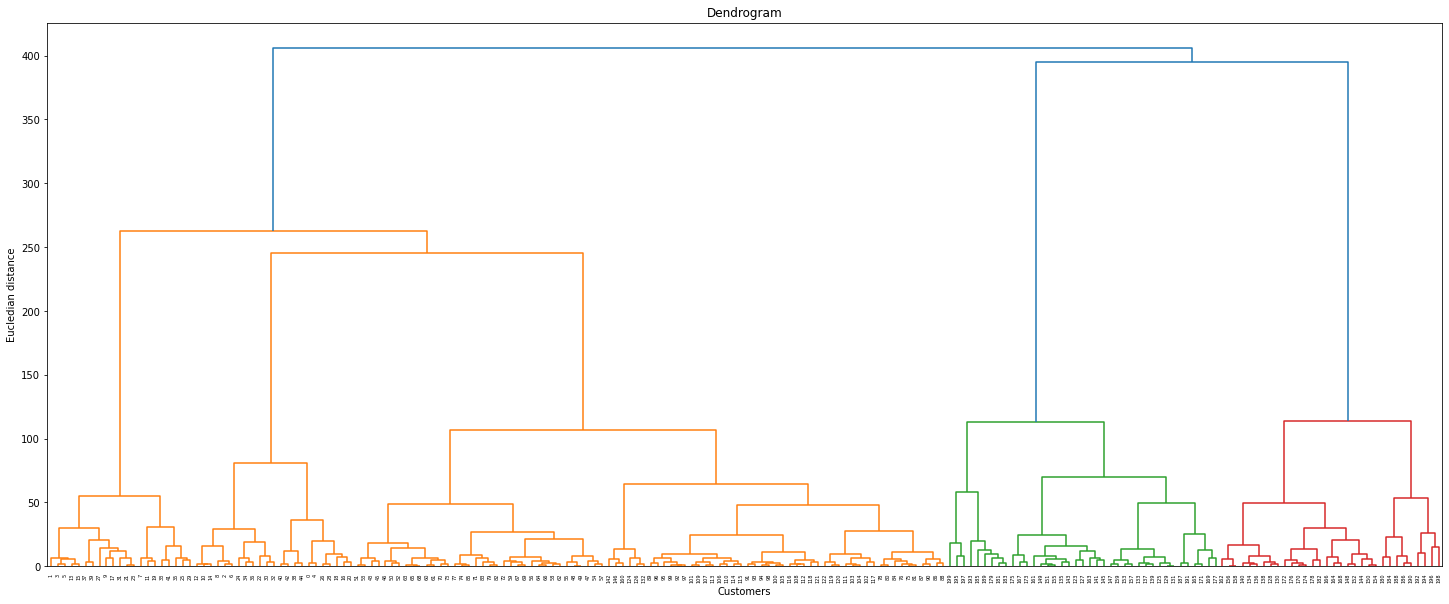

In [137]:
# Visualising the dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

So the optimal number of custers  = 5


Applying Agglomerative Hierarchical Clustering : 

In [138]:
from sklearn.cluster import AgglomerativeClustering

In [139]:
# creating object hc of class AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [140]:
# it gives an array which tells as to which data point belongs to which cluster (0,1,2,3,4)
y_hc=hc.fit_predict(x)

In [141]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [142]:
y_hc.astype

<function ndarray.astype>

In [143]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [144]:
x.astype

<function ndarray.astype>

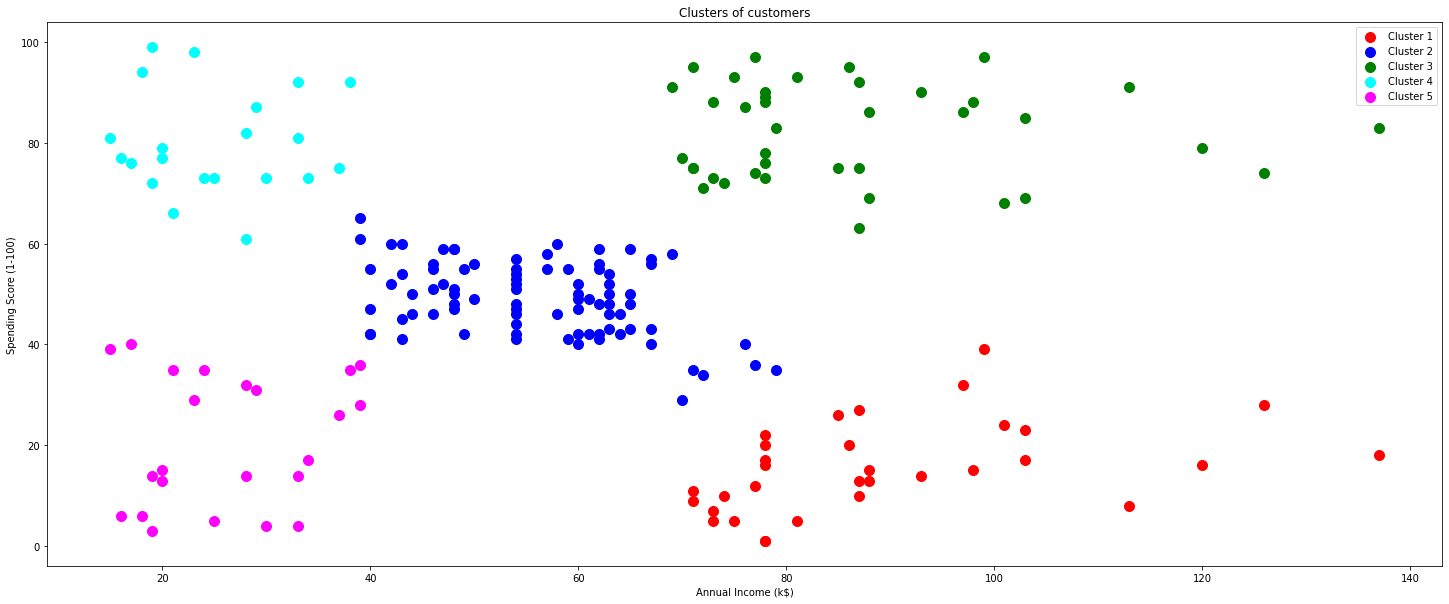

In [145]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [146]:
import plotly.express as px
fig = px.scatter_3d(data_drop, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_hc, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

# Comparison

In this section clusters genereated by 2 algorithms will be compared and discussed.

Both k means and hierarchical clustering methods worked well.

In [154]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only
KM_clusters = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10,random_state=0).fit(X) # initialise and fit K-Means model
KM_clustered = X.copy()
KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM size"]
KM_clust_sizes

,KM size
Cluster,
0,35
1,81
2,39
3,22
4,23


In [155]:
HC_clusters = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward").fit(X) # initialise and fit HC model
HC_clustered = X.copy()
HC_clustered.loc[:,'Cluster'] = HC_clusters.labels_
HC_clust_sizes = HC_clustered.groupby('Cluster').size().to_frame()
HC_clust_sizes.columns = ["HC size"]
HC_clust_sizes

,HC size
Cluster,
0,32
1,85
2,39
3,21
4,23


In [156]:
# Calculating the performance of the clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [157]:
# Filtering the age and spending score from the dataset
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [158]:
#Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 5)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 5)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.55393
Calinski Harabasz Score : 247.35899


In [152]:
#Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 5)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 5)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.55299
Calinski Harabasz Score : 243.07143


In [153]:
#Tabulating the results
from tabulate import tabulate
table = []
print('Segmentation using Annual Income, and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Annual Income, and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │            0.55393 │                   247.359 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │            0.55299 │                   243.071 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


From the above table, we can see that K-Means and Hierarchial clustering performs approx the same on comparing the Silhouette score and Calinski Harabasz score.

# Conclusion
Hence, K-Means and Hierarchial clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.